In [ ]:
# gtp3? 써봐?
# RNN은 왜 로스가 별로일까?
# 토큰화 방법 -> 데이터프레임, 

####한글 폰트 불러오기 & 필요한 탬플릿 가져오기

In [ ]:
!pip install konlpy

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("ggplot")

import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

import re
import warnings
warnings.filterwarnings(action='ignore')
import nltk
nltk.download('all')
 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

# 데이터 불러오기

## DACON 데이터

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!cp /gdrive/MyDrive/tmp/dataset.zip ./

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


In [ ]:
data = pd.read_csv('./dataset/train.csv')
data

,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0
...,...,...,...
4995,4996,좋은 배우들로 3류영화를 찍은 안타까운 영화,0
4996,4997,진짜 드럽게 재미없다 에드워드 호퍼 그림에 배경 빼고는 볼게 아닌영화,0
4997,4998,가장 실망스러운 영화.. 지금까지 본영화중..,0
4998,4999,"이런 평점 테러, 네이버에서 좀 막아야 하는 것 아닌가?",1


## Github 데이터

In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f1c93ec8e50>)

In [ ]:
data = pd.read_csv('ratings_train.txt', sep='\t', quoting=3)

In [ ]:
datanum = 5000

In [ ]:
data = data.sample(datanum, replace = False)
data

,id,document,label
85048,8357466,굉장히 저평가되는 영화중 하나라고 생각함,1
143459,7580256,에니메이션 출연진에 성우는 없고 개그맨 탈렌트만 있네요... 왜죠?,0
133580,4203598,한국 최악의 Worst 5 영화란 말에 궁금해서 본 1人,0
54629,9337532,퀴어영화에 ㅅㅅ얘기좀 안넣으면안되나. 현실적으로좀 그렸음한다. 그럼 일반인들이 훨씬...,0
45889,10044932,끝나고 먹먹해져보긴 처음이다...성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,1
...,...,...,...
44979,4023335,다좋지만 알바는 제발 가라..,0
81508,9864481,8~90년대 영화인줄알았다,0
118316,9984359,역겨운 표절작. 부끄러운줄 알아야지.,0
19067,871845,역시 박선영씌 연기 빼고는 볼게 없는 영화 ㅋㅋㅋㅋ,1


In [ ]:
list = np.arange(datanum)
data.index = list
data

,id,document,label
0,8357466,굉장히 저평가되는 영화중 하나라고 생각함,1
1,7580256,에니메이션 출연진에 성우는 없고 개그맨 탈렌트만 있네요... 왜죠?,0
2,4203598,한국 최악의 Worst 5 영화란 말에 궁금해서 본 1人,0
3,9337532,퀴어영화에 ㅅㅅ얘기좀 안넣으면안되나. 현실적으로좀 그렸음한다. 그럼 일반인들이 훨씬...,0
4,10044932,끝나고 먹먹해져보긴 처음이다...성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,1
...,...,...,...
4995,4023335,다좋지만 알바는 제발 가라..,0
4996,9864481,8~90년대 영화인줄알았다,0
4997,9984359,역겨운 표절작. 부끄러운줄 알아야지.,0
4998,871845,역시 박선영씌 연기 빼고는 볼게 없는 영화 ㅋㅋㅋㅋ,1


## 결측치 확인

In [ ]:
data.info() # 데이터 살펴보기

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   document  5000 non-null   object
 2   label     5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 156.2+ KB


In [ ]:
data.isna().sum() # 결측치 확인

id          0
document    0
label       0
dtype: int64

In [ ]:
data = data.dropna(how = 'any')

# 데이터 분석

## 긍정 부정 나누기

라벨 0인 리뷰 개수: 2564
라벨 1인 리뷰 개수: 2436


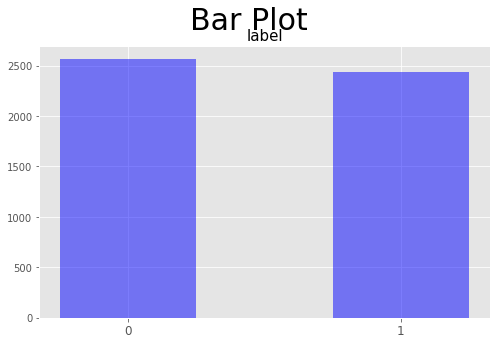

In [ ]:
# 긍정/부정 리뷰 비율 확인

val_count = data['label'].value_counts() # 유니크값의 개수 확인
print('라벨 0인 리뷰 개수:', val_count[0])
print('라벨 1인 리뷰 개수:', val_count[1])


# 히스토그램 을 사용해 데이터의 분포 살펴보기
feature = data['label']

plt.figure(figsize=(7, 5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label', fontsize=15) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [ ]:
# 데이터 필터링을 위한 마스크 설정
mask_pos = (data.label == 1)
mask_neg = (data.label == 0)

# 전체 / 긍정 / 부정 리뷰 집합을 설정합니다.
df_train = data.document.copy() # 전체 train 데이터
df_pos = data.loc[mask_pos,:].document # train 데이터 중 긍정 리뷰
df_neg = data.loc[mask_neg,:].document # train 데이터 중 부정 리뷰

# 세 집합을 리스트로 묶어줍니다.
compare = [df_train, df_pos, df_neg]

In [ ]:
# 긍정/ 부정 데이터셋이 잘 분리되었는지 확인

print(df_pos.head()) # 긍정 데이터 확인
print(df_neg.head()) # 부정 데이터 확인

1            히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...
2    괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~
5       내인생에 있어 손까락에 꼽히는 영화 원작을 능가한 리메이크작
7          마음이 성숙하고 보면 다르게 보이는 영화.. 걸작이다.
8                   가슴 찡했던, 오래 기억에남을 영화!!
Name: document, dtype: object
0                  영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐
3                아무래도 20년도지난작품이라 지금보기는너무유치하다
4    지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.
6                성룡영화중 최악 .. 차라리 러시아워가 훨씬 나음
9                   결말 기분나쁘다 공포매니아에게 이따위 결말을
Name: document, dtype: object


## 데이터 비교

In [ ]:
# 리뷰 길이 확인

str_len_mean = np.mean(data['document'].str.len()) # 리뷰 길이의 평균값 계산
print('리뷰의 평균 길이 :',str_len_mean)

리뷰의 평균 길이 : 27.1352


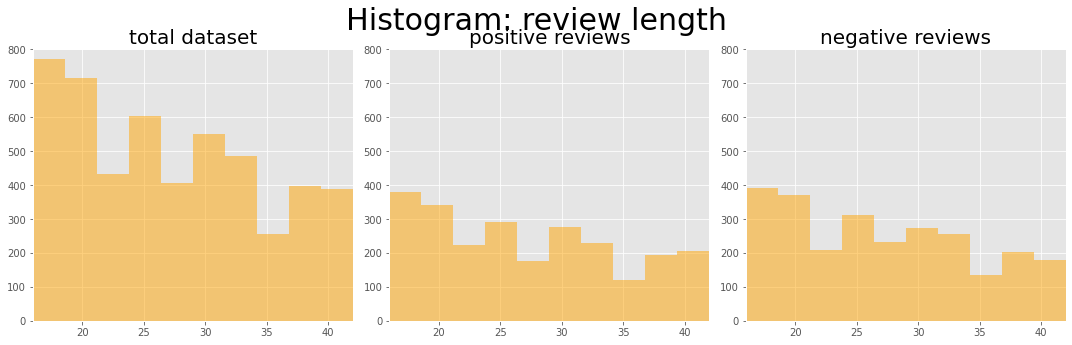

In [ ]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(15,5))
plt.suptitle("Histogram: review length", fontsize=30)
name = ['total dataset', 'positive reviews', 'negative reviews'] # 제목으로 사용할 문자열

for i in range(len(compare)):
    document = compare[i]
    string_len = [len(x) for x in document]    
    plt.subplot(1,3,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([16, 42, 0, 800])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(string_len, alpha=0.5, color='orange') # 히스토그램 생성, alpha: 그래프의 투명도 조절
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

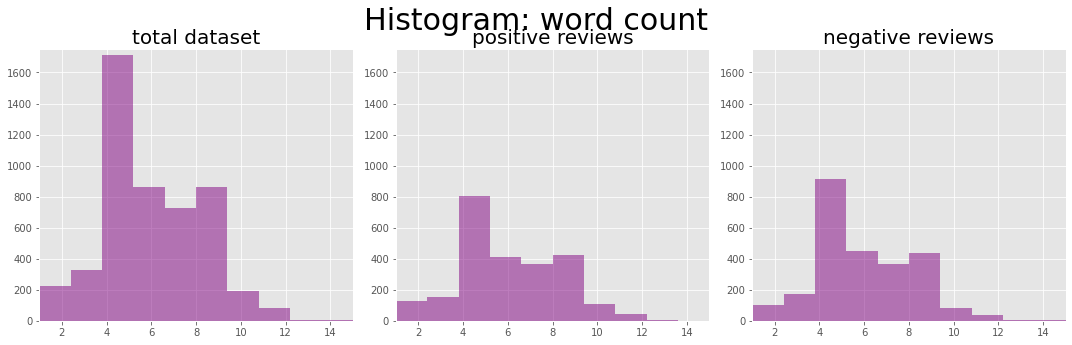

In [ ]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(15,5))
plt.suptitle("Histogram: word count", fontsize=30)
name = ['total dataset', 'positive reviews', 'negative reviews'] # 제목으로 사용할 문자열

for i in range(len(compare)):
    document = compare[i]
    split = document.str.split()
    split_len = [len(x) for x in split] 
    plt.subplot(1,3,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([1, 15, 0, 1750])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(split_len, alpha=0.5, color='purple')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
def df2str(df):
    #전체 리뷰들을 하나의 문자열로 만듦
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

def get_noun(text):
    # okt tagger를 이용해 명사 추출
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)

    return noun_list

def visualize(noun_list, title):
    # 워드클라우드 이미지 생성
    wc= WordCloud(
        font_path = 'NanumBarunGothic.ttf',    # 한글폰트 경로 설정
        background_color='white',                             # 배경 색깔 정하기
        colormap = 'Dark2',                                # 폰트 색깔 정하기
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list)) 
    
    plt.figure(figsize=(10,10)) #이미지 사이즈 지정
    plt.suptitle("Word Cloud", fontsize=30)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation='lanczos') #이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거
    plt.show()  # 워드클라우드 이미지 확인
    
    return wc

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


{'영화': 1501, '정말': 320, '진짜': 269, '최고': 220, '평점': 185, '연기': 181, '감동': 161, '재미': 152, '보고': 140, '스토리': 130}


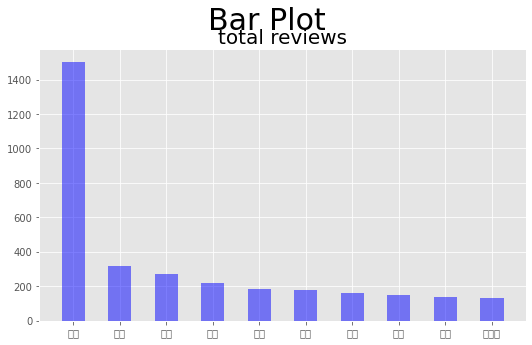

In [ ]:
# 전체 train 데이터

document = df2str(df_train) # 전체 리뷰들을 하나의 문자열로 만듦
noun_list = get_noun(document) # 명사 추출, 개수 셈
print(dict(noun_list[:10])) # 상위 10개 단어 확인

top_10 = dict(noun_list[:10])
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(7.5, 5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('total reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

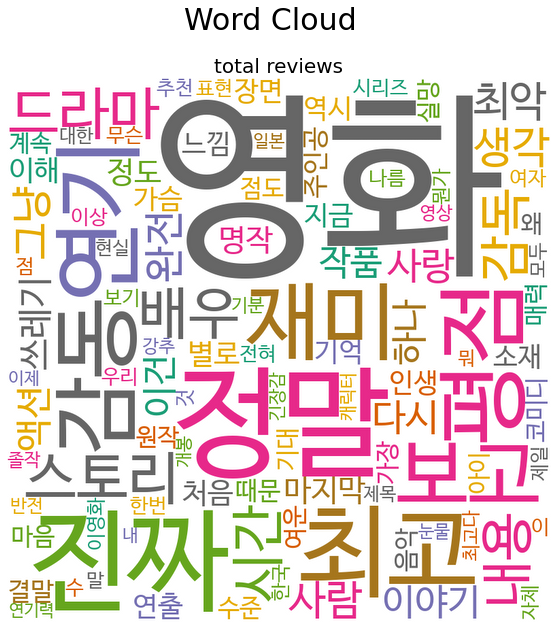

In [ ]:
total_reviews = visualize(noun_list,'total reviews') # 워드클라우드 시각화

{'영화': 757, '정말': 216, '최고': 214, '진짜': 136, '감동': 134, '연기': 108, '드라마': 89, '보고': 88, '사랑': 72, '다시': 70}


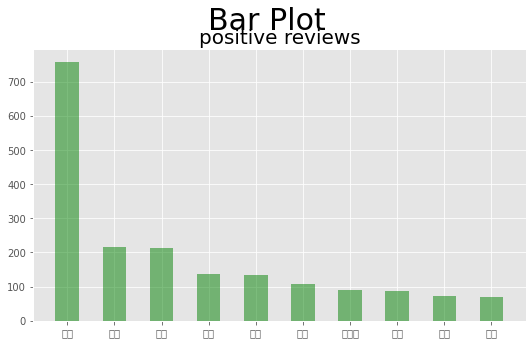

In [ ]:
document_p = df2str(df_pos) # 긍정 리뷰 데이터프레임을 하나의 큰 문자열로 만듦
noun_list_p = get_noun(document_p) # 명사만을 추출하고 빈도수를 계산
print(dict(noun_list_p[:10])) # 상위 10개 단어 확인
top_10 = dict(noun_list_p[:10])

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(7.5, 5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('positive reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='green', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

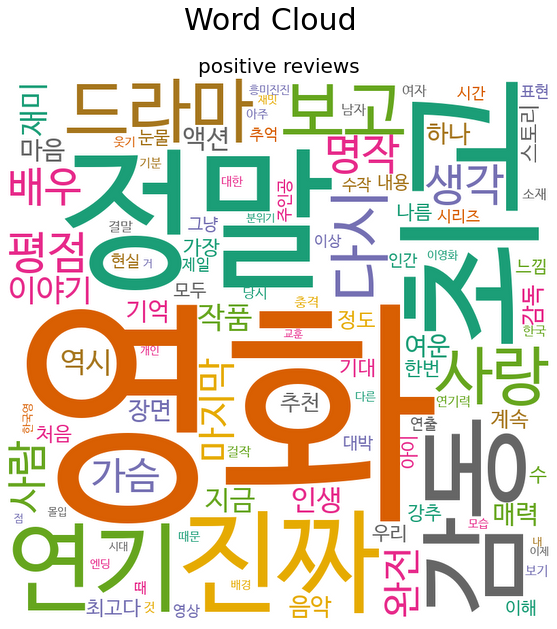

In [ ]:
positive_reviews = visualize(noun_list_p, 'positive reviews') # 워드클라우드 시각화

{'영화': 746, '진짜': 132, '평점': 118, '재미': 104, '정말': 104, '스토리': 102, '최악': 98, '시간': 97, '내용': 85, '감독': 78}


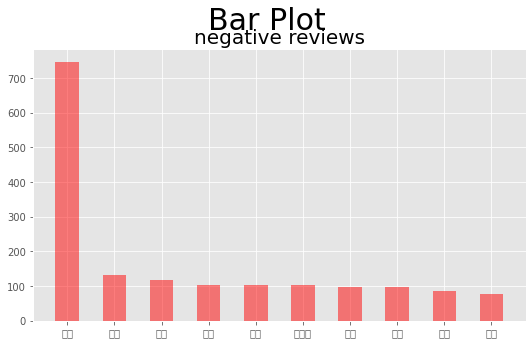

In [ ]:
document_n = df2str(df_neg) # 부정 리뷰 데이터프레임을 하나의 큰 문자열로 만듦
noun_list_n = get_noun(document_n) # 명사만을 추출하고 빈도수를 계산
print(dict(noun_list_n[:10]))
top_10 = dict(noun_list_n[:10])

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(7.5,5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('negative reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='r', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

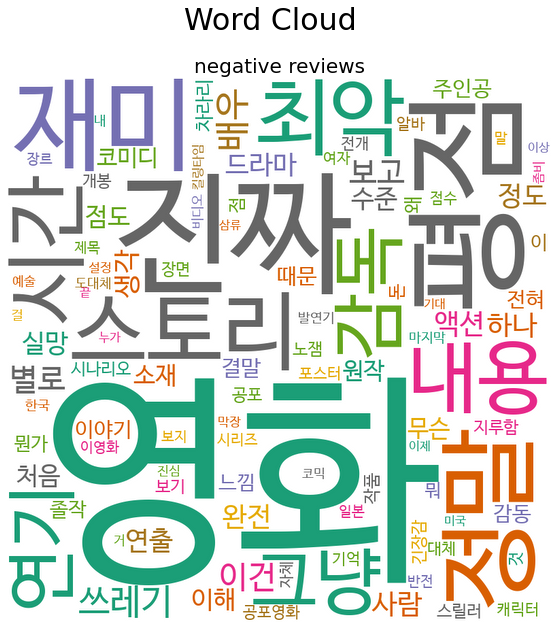

In [ ]:
negative_reviews = visualize(noun_list_n, 'negative reviews') # 워드클라우드 시각화

## 중복 단어 제거 후 비교

In [ ]:
print("긍정 리뷰 Top10:", noun_list_p[:10])
print("부정 리뷰 Top10:", noun_list_n[:10])

긍정 리뷰 Top10: [('영화', 757), ('정말', 216), ('최고', 214), ('진짜', 136), ('감동', 134), ('연기', 108), ('드라마', 89), ('보고', 88), ('사랑', 72), ('다시', 70)]
부정 리뷰 Top10: [('영화', 746), ('진짜', 132), ('평점', 118), ('재미', 104), ('정말', 104), ('스토리', 102), ('최악', 98), ('시간', 97), ('내용', 85), ('감독', 78)]


In [ ]:
pos = list(dict(noun_list_p).keys())
neg = list(dict(noun_list_n).keys()) # key(명사) 만을 이용해 리스트 생성

drop_words = [x for x in neg if x in pos] # 부정리뷰의 명사가 긍정리뷰에도 있을 경우 drop_words 리스트에 저장
print("공통으로 등장하는 단어들 Top10\n",drop_words[:10])

공통으로 등장하는 단어들 Top10
 ['영화', '진짜', '평점', '재미', '정말', '스토리', '시간', '내용', '감독', '그냥']


In [ ]:
noun_list_p_filter = [x for x in noun_list_p if x[0] not in drop_words] # drop_words 리스트에 없는 긍정리뷰 명사 저장
noun_list_n_filter = [x for x in noun_list_n if x[0] not in drop_words] # drop_words 리스트에 없는 부정리뷰 명사 저장

긍정 리뷰 Top10: [('최고', 214), ('사랑', 72), ('다시', 70), ('명작', 60), ('가슴', 51), ('역시', 44), ('인생', 41), ('지금', 39), ('매력', 35), ('마음', 34)]


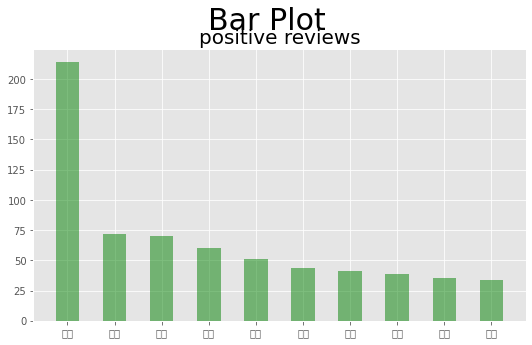

In [ ]:
print("긍정 리뷰 Top10:", noun_list_p_filter[:10])
top_10 = dict(noun_list_p_filter[:10])

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(7.5, 5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('positive reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='green', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

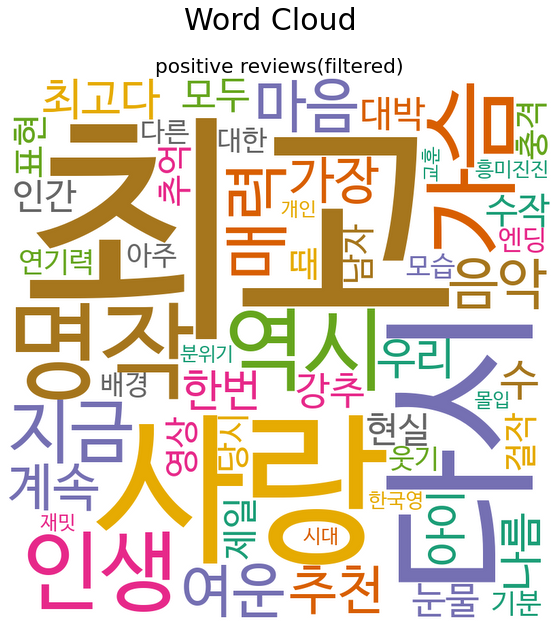

In [ ]:
positive_reviews_filtered = visualize(noun_list_p_filter, 'positive reviews(filtered)') # 워드클라우드 시각화

부정 리뷰 Top10: [('최악', 98), ('쓰레기', 70), ('이건', 55), ('별로', 53), ('실망', 36), ('수준', 36), ('점도', 34), ('원작', 31), ('무슨', 31), ('코미디', 29)]


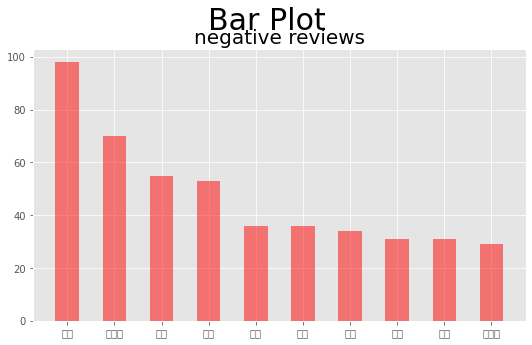

In [ ]:
print("부정 리뷰 Top10:", noun_list_n_filter[:10])
top_10 = dict(noun_list_n_filter[:10])

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(7.5, 5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('negative reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='r', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

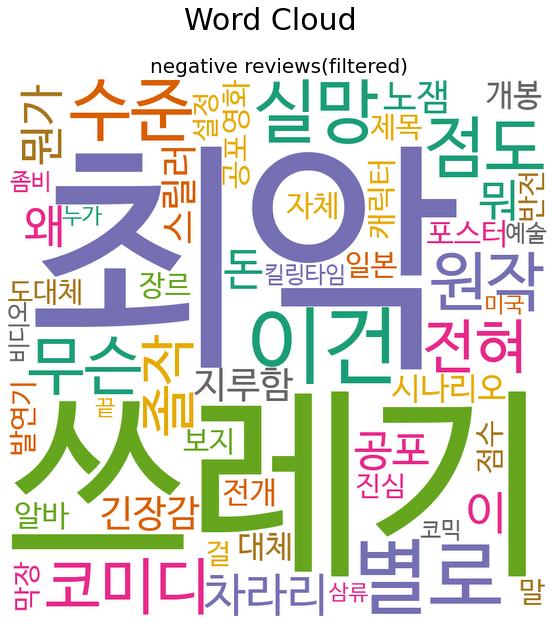

In [ ]:
negative_reviews_filtered = visualize(noun_list_n_filter, 'negative reviews(filtered)') # 워드클라우드 시각화

# 토큰화

In [ ]:
data['preprocessed'] = data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
data['preprocessed'] = data['preprocessed'].str.replace(" +", " ") # 다중 공백 제거
data[:5] # 데이터 확인

,id,document,label,preprocessed
0,8357466,굉장히 저평가되는 영화중 하나라고 생각함,1,굉장히 저평가되는 영화중 하나라고 생각함
1,7580256,에니메이션 출연진에 성우는 없고 개그맨 탈렌트만 있네요... 왜죠?,0,에니메이션 출연진에 성우는 없고 개그맨 탈렌트만 있네요 왜죠
2,4203598,한국 최악의 Worst 5 영화란 말에 궁금해서 본 1人,0,한국 최악의 영화란 말에 궁금해서 본
3,9337532,퀴어영화에 ㅅㅅ얘기좀 안넣으면안되나. 현실적으로좀 그렸음한다. 그럼 일반인들이 훨씬...,0,퀴어영화에 ㅅㅅ얘기좀 안넣으면안되나 현실적으로좀 그렸음한다 그럼 일반인들이 훨씬더 ...
4,10044932,끝나고 먹먹해져보긴 처음이다...성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,1,끝나고 먹먹해져보긴 처음이다성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다


In [ ]:
okt = Okt() # 인스턴스 할당

tokenized = []                                                                    # 데이터프레임의 한 컬럼으로 추가할 리스트
for sentence in data['preprocessed']:                                             # 전처리된 리뷰들을 하나씩 꺼내옵니다
    tokens = okt.morphs(sentence, stem = True)                                    # 형태소 분석 (stem = True : 어간 추출)
    tokenize = " ".join(tokens)                                                   # tokens라는 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join
    tokenized.append(tokenize)                                                    # 형태소 단위로 띄어쓰기된 문자열을 최종 리스트에 추가
data["tokenized_stem"] = pd.DataFrame(tokenized)                                  # 리스트를 데이터프레임으로 변환해 tokenized_stem라는 컬럼명으로 추가

data.head() # 데이터 확인

,id,document,label,preprocessed,tokenized_stem
0,8357466,굉장히 저평가되는 영화중 하나라고 생각함,1,굉장히 저평가되는 영화중 하나라고 생각함,굉장하다 저 평가 되다 영화 중 하나 라고 생각 함
1,7580256,에니메이션 출연진에 성우는 없고 개그맨 탈렌트만 있네요... 왜죠?,0,에니메이션 출연진에 성우는 없고 개그맨 탈렌트만 있네요 왜죠,에 니 메이 션 출연 진 에 성우 는 없다 개그맨 탈 렌트 만 있다 왜 죠
2,4203598,한국 최악의 Worst 5 영화란 말에 궁금해서 본 1人,0,한국 최악의 영화란 말에 궁금해서 본,한국 최악 의 영 화란 말 에 궁금하다 보다
3,9337532,퀴어영화에 ㅅㅅ얘기좀 안넣으면안되나. 현실적으로좀 그렸음한다. 그럼 일반인들이 훨씬...,0,퀴어영화에 ㅅㅅ얘기좀 안넣으면안되나 현실적으로좀 그렸음한다 그럼 일반인들이 훨씬더 ...,퀴어 영화 에 ㅅㅅ 얘기 좀 안 넣다 안되다 현실 적 으로 좀 그리다 하다 그렇다 ...
4,10044932,끝나고 먹먹해져보긴 처음이다...성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,1,끝나고 먹먹해져보긴 처음이다성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,끝나다 먹다 먹다 지다 보다 처음 이다 성당 에서 그녀 를 바라보다 남자 의 눈빛 ...


In [ ]:
main_pos = [] # 데이터프레임의 새 컬럼이 될 리스트
for sentence in data['document']: # 리뷰들을 하나씩 가져옵니다
    pos = okt.pos(sentence) # 형태소 분석 후 해당 리스트를 pos라는 변수로 받기
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")] # 가져오고자 하는 품사에 해당하는 형태소를 main_words 리스트에 추가
    main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join
    main_pos.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가
data["main_pos"] = pd.DataFrame(main_pos) # 리스트를 데이터프레임으로 변환해 main_pos라는 컬럼명으로 추가

data.head() # 데이터 확인

,id,document,label,preprocessed,tokenized_stem,main_pos
0,8357466,굉장히 저평가되는 영화중 하나라고 생각함,1,굉장히 저평가되는 영화중 하나라고 생각함,굉장하다 저 평가 되다 영화 중 하나 라고 생각 함,굉장히 평가 되는 영화 하나 생각 함
1,7580256,에니메이션 출연진에 성우는 없고 개그맨 탈렌트만 있네요... 왜죠?,0,에니메이션 출연진에 성우는 없고 개그맨 탈렌트만 있네요 왜죠,에 니 메이 션 출연 진 에 성우 는 없다 개그맨 탈 렌트 만 있다 왜 죠,메이 션 출연 진 성우 없고 개그맨 탈 렌트 있네요 왜
2,4203598,한국 최악의 Worst 5 영화란 말에 궁금해서 본 1人,0,한국 최악의 영화란 말에 궁금해서 본,한국 최악 의 영 화란 말 에 궁금하다 보다,한국 최악 화란 말 궁금해서 본
3,9337532,퀴어영화에 ㅅㅅ얘기좀 안넣으면안되나. 현실적으로좀 그렸음한다. 그럼 일반인들이 훨씬...,0,퀴어영화에 ㅅㅅ얘기좀 안넣으면안되나 현실적으로좀 그렸음한다 그럼 일반인들이 훨씬더 ...,퀴어 영화 에 ㅅㅅ 얘기 좀 안 넣다 안되다 현실 적 으로 좀 그리다 하다 그렇다 ...,퀴어 영화 얘기 좀 넣으면 안되나 현실 좀 그렸음 한다 그럼 일반인 훨씬 더 거부 ...
4,10044932,끝나고 먹먹해져보긴 처음이다...성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,1,끝나고 먹먹해져보긴 처음이다성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,끝나다 먹다 먹다 지다 보다 처음 이다 성당 에서 그녀 를 바라보다 남자 의 눈빛 ...,끝나고 먹 먹해 져 보긴 처음 성당 그녀 바라보는 남자 눈빛 잊을수가 없다


In [ ]:
data.drop(columns=["id", "preprocessed", "tokenized_stem"], inplace=True)
data.head()

,document,label,main_pos
0,굉장히 저평가되는 영화중 하나라고 생각함,1,굉장히 평가 되는 영화 하나 생각 함
1,에니메이션 출연진에 성우는 없고 개그맨 탈렌트만 있네요... 왜죠?,0,메이 션 출연 진 성우 없고 개그맨 탈 렌트 있네요 왜
2,한국 최악의 Worst 5 영화란 말에 궁금해서 본 1人,0,한국 최악 화란 말 궁금해서 본
3,퀴어영화에 ㅅㅅ얘기좀 안넣으면안되나. 현실적으로좀 그렸음한다. 그럼 일반인들이 훨씬...,0,퀴어 영화 얘기 좀 넣으면 안되나 현실 좀 그렸음 한다 그럼 일반인 훨씬 더 거부 ...
4,끝나고 먹먹해져보긴 처음이다...성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,1,끝나고 먹 먹해 져 보긴 처음 성당 그녀 바라보는 남자 눈빛 잊을수가 없다


In [ ]:
data.isna().sum() # 결측치 확인

document    0
label       0
main_pos    0
dtype: int64

In [ ]:
data = data.dropna(how = 'any')

# Logistic Regression & Soft Vector Machine

In [ ]:
train, val = train_test_split(data)
train.reset_index(inplace=True) # 전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
val.reset_index(inplace=True)

In [ ]:
X_train = train.main_pos #training 데이터에서 문서 추출
y_train = train.label #training 데이터에서 라벨 추출

In [ ]:
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(X_train) # countvectorizer 학습
X_train_vec = vectorizer.transform(X_train) # transform

In [ ]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
model1 = LogisticRegression() #객체에 모델 할당
model1.fit(X_train_vec, y_train) #모델 학습

LogisticRegression()

In [ ]:
X_val = val.main_pos #validation 데이터에서 전처리된 문서 추출
y_val = val.label #validation 데이터에서 라벨 추출

X_val_vec = vectorizer.transform(X_val) # train셋으로 fit한 벡터라이저 이용해 transform

In [ ]:
#run model
y_pred1 = model1.predict(X_val_vec)
print(y_pred1)
#0:negative 1:positive

[1 0 1 ... 0 0 0]


In [ ]:
from sklearn import metrics
print('Linear Regression accuracy =', metrics.accuracy_score(y_val, y_pred1)) # 정확도 확인

Linear Regression accuracy = 0.7752


In [ ]:
from sklearn import svm
model2 = svm.SVC()  #객체에 모델 할당
model2.fit(X_train_vec, y_train) #모델 학습

SVC()

In [ ]:
#run model
y_pred2 = model2.predict(X_val_vec)
print(y_pred2)
#0:negative 1:positive

[0 0 1 ... 0 0 0]


In [ ]:
from sklearn import metrics
print('Soft Vector Machine accuracy =', metrics.accuracy_score(y_val, y_pred2)) # 정확도 확인

Soft Vector Machine accuracy = 0.7556


# DNN

In [ ]:
train_x = data.main_pos
train_y = data.label

In [ ]:
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(train_x) # countvectorizer 학습
train_x = vectorizer.transform(train_x) # transform

In [ ]:
print(type(train_x))
print(type(train_y))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'pandas.core.series.Series'>


In [ ]:
#train_x = train_x.toarray()

ft = vectorizer.get_feature_names()
train_x = pd.DataFrame.sparse.from_spmatrix(train_x, columns=ft)

In [ ]:
train_x

,가가,가게,가격,가고,가고도,가고싶다,가관,가기,가기전에,가까운,가까이,가까지,가깝다는것은,가끔,가나,가나다,가난하고,가난한,가네,가는,가는데,가는줄,가는줄도,가늠,가능,가능성,가능한,가다있노,가닥,가더,가되,가득,가득합니까,가라,가락,가랑이,가렛,가려다가,가르쳐,가르쳐주세요,...,흥미롭네요,흥미롭다,흥미롭지,흥미롭지도,흥미진진,흥해,흥행,희귀,희망,희망이,희생,희을,희재,히나타,히데,히로,히로스에,히스토리,히어로,히트,히히히,힐거,힐링,힘겹게,힘내세요,힘든,힘든데,힘들,힘들것,힘들게,힘들다,힘들듯,힘들었나,힘들었을,힘들었을듯,힘들었음,힘들잖아,힘듭니다,힘찬,힙합
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_x = train_x.to_numpy()

In [ ]:
print(train_x.shape)
print(train_x)

(5000, 12049)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
np.where(train_x == 1)

(array([   0,    0,    0, ..., 4999, 4999, 4999]),
 array([ 699, 2565, 5573, ..., 1619, 4593, 9288]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120500    
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 120,632
Trainable params: 120,632
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
30/30 [==============================] - 1s 23ms/step - loss: 0.7474 - acc: 0.5022 - val_loss: 0.6920 - val_acc: 0.5100
Epoch 2/40
30/30 [==============================] -

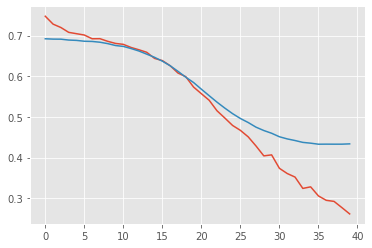

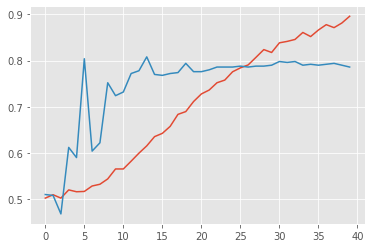

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from keras.layers import Dense, Dropout, Activation, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input
from tensorflow.keras import layers
from tensorflow.keras import initializers

ACTIVATION = 'sigmoid'
DROPOUT = 0.4
OPTIMIZER = 'rmsprop'
LOSS = 'sparse_categorical_crossentropy'    #'binary_crossentropy'
EPOCH = 40
BATCH_SIZE = 150

initt = initt = initializers.glorot_normal(seed=None)

model = keras.Sequential()
model.add(Dense(10, activation=ACTIVATION, kernel_initializer = initt, input_shape=(train_x.shape[-1],)))
model.add(Dense(10,  activation=ACTIVATION))
model.add(Dropout(DROPOUT))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=["acc"])
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)

history = model.fit(train_x, train_y, epochs=EPOCH, batch_size=BATCH_SIZE, validation_split=0.1, callbacks=[early_stopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

# RNN - LSTM

In [ ]:
word_split = data['main_pos'].str.split()
word_split[:5]

0                          [풋볼, 인생, 축소, 판, 지나도, 촌, 않다]
1                                             [편, 봅시다]
2                                         [볼때, 운다, 최고]
3                         [감동, 마지막, 장면, 정말, 감동, 이었습니다]
4    [많은, 사람, 이, 다큐, 보고, 우리나라, 슬픈, 현대, 사의, 한, 단면, 대...
Name: main_pos, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer() # 토큰화
tokenizer.fit_on_texts(word_split) # 단어 인덱스 구축

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수 = 6648개
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value 

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1 # 카운트
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 12758
등장 빈도가 2번 이하인 희귀 단어의 수: 10014
단어 집합에서 희귀 단어의 비율: 78.4919266342687
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 25.536163931579402


In [ ]:
vocab_size = total_cnt
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 12758


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(word_split)
X_train = tokenizer.texts_to_sequences(word_split)
X_train[:3]

[[4495, 110, 4496, 365, 1978, 1979, 542], [104, 2745], [734, 1980, 8]]

In [ ]:
print(len(X_train))

5000


In [ ]:
print("가장 긴 리뷰의 길이", max(len(review) for review in X_train))
print("리뷰의 평균 길이", sum(map(len, X_train))/len(X_train))

가장 긴 리뷰의 길이 45
리뷰의 평균 길이 9.2134


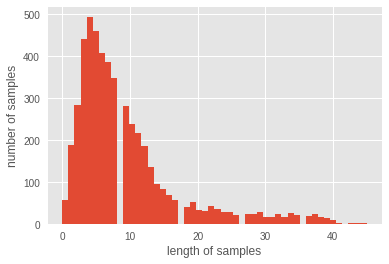

In [ ]:
# train 데이터의 리뷰의 길이 시각화
import matplotlib.pyplot as plt
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 40
X_train = pad_sequences(X_train, maxlen=max_len)

In [ ]:
y_train = data['label']

In [ ]:
X_train[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        4495,  110, 4496,  365, 1978, 1979,  542],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  104, 2745],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  734, 1980,    8]], dtype=int32)

Epoch 1/15
81/90 [==========================>...] - ETA: 0s - loss: 0.6972 - acc: 0.5017
Epoch 00001: val_acc improved from -inf to 0.48400, saving model to best_model.h5
90/90 [==============================] - 1s 4ms/step - loss: 0.6970 - acc: 0.5016 - val_loss: 0.6982 - val_acc: 0.4840
Epoch 2/15
75/90 [========================>.....] - ETA: 0s - loss: 0.6950 - acc: 0.5053
Epoch 00002: val_acc improved from 0.48400 to 0.49000, saving model to best_model.h5
90/90 [==============================] - 0s 3ms/step - loss: 0.6950 - acc: 0.5084 - val_loss: 0.6966 - val_acc: 0.4900
Epoch 3/15
84/90 [===========================>..] - ETA: 0s - loss: 0.6944 - acc: 0.5145
Epoch 00003: val_acc did not improve from 0.49000
90/90 [==============================] - 0s 3ms/step - loss: 0.6944 - acc: 0.5138 - val_loss: 0.6968 - val_acc: 0.4760
Epoch 4/15
90/90 [==============================] - ETA: 0s - loss: 0.6941 - acc: 0.5087
Epoch 00004: val_acc did not improve from 0.49000
90/90 [=============

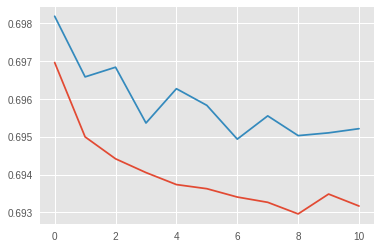

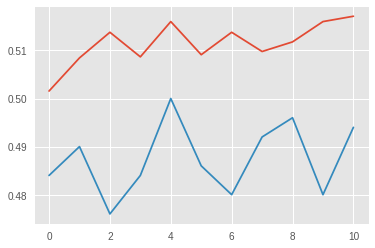

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path as osp
from konlpy.tag import Okt
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
from tensorflow.keras import initializers

embedding_dim = 100
hidden_units = 128
ACTIVATION = 'sigmoid'

initt = initializers.glorot_normal(seed=None)

model = Sequential()
#model.add(Embedding(vocab_size, embedding_dim))
#model.add(LSTM(hidden_units))
model.add(Dense(10, kernel_initializer = initt, activation = ACTIVATION))
model.add(Dense(10, activation = ACTIVATION))
#model.add(Dense(128, activation = ACTIVATION))
#model.add(Dense(128, activation = ACTIVATION))
#model.add(Dense(128, activation = ACTIVATION))
#model.add(Dense(64, activation = ACTIVATION))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=50, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

In [ ]:
total = len(pred_test)
correct = 0

ans = test.label
ans = ans.to_numpy()

for i in range(total) :
  if ans[i] == result[i] :
    correct = correct + 1

accuracy = correct / total
accuracy

0.7718

In [ ]:
result = []

for i in range(len(pred_test)) :
  a = pred_test[i,0]
  b = pred_test[i,1]
  if a > b :
    result.append(0)
  else :
    result.append(1)

print(result)

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 

(array([[662., 332., 258., 211., 177., 173., 165., 147., 173., 155., 408.,
         149., 184., 165., 160., 164., 195., 233., 288., 601.],
        [601., 288., 233., 195., 164., 160., 165., 184., 149., 408., 155.,
         173., 147., 165., 173., 177., 211., 258., 332., 662.]]),
 array([0.00405753, 0.05365178, 0.10324603, 0.15284027, 0.20243451,
        0.25202876, 0.301623  , 0.35121724, 0.4008115 , 0.45040572,
        0.49999997, 0.5495942 , 0.59918845, 0.64878273, 0.69837695,
        0.7479712 , 0.79756546, 0.8471597 , 0.8967539 , 0.9463482 ,
        0.9959424 ], dtype=float32),
 <a list of 2 Lists of Patches objects>)

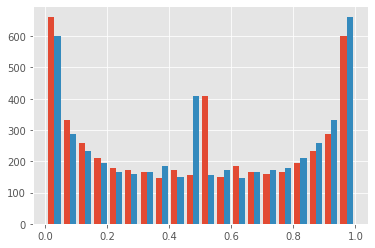

In [ ]:
plt.hist(pred_test, bins=20)

In [ ]:
X_test = test.main_pos
X_test_vec = vectorizer.transform(X_test)
pred_test = model.predict(X_test_vec)
print(pred_test)

[[0.68436354 0.3156365 ]
 [0.73724025 0.26275972]
 [0.6076225  0.3923775 ]
 ...
 [0.01185144 0.9881486 ]
 [0.98044467 0.01955532]
 [0.05523957 0.9447604 ]]


# test 진행

## 데이콘 데이터

In [ ]:
test = pd.read_csv('dataset/test.csv')
test

,id,document
0,1,시간 때우기 좋은 영화 지루함
1,2,훈훈한 정이 느껴지는 영화! 가족끼리 드라마 보듯이 보면 딱~!
2,3,Childhood fantasy
3,4,멋있는 영화입니다. 잊을 수 없는!
4,5,너무 감동적이네요 펑펑 울었습니다
...,...,...
4995,4996,연계도 제대로 안되고 뭔가 부족한느낌이들고 찝찝한영화
4996,4997,내생에 최악의 영화중 하나 졸려서 미칠뻔....
4997,4998,지금까지 나온 드라마 중 최고였습니다. 100점 만점!
4998,4999,영화값으로 엄청난 공연을 보았다 - 이게 웬 횡재 ..


In [ ]:
test.isna().sum()

id          0
document    0
dtype: int64

In [ ]:
# preprocessed
test['preprocessed'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
test['preprocessed'] = test['preprocessed'].str.replace(" +", " ") # 다중 공백 제거

# tokenized_stem
tokenized = []
for sentence in test['preprocessed']:
    tokens = okt.morphs(sentence, stem = True) # stem = True로 설정해 어간 추출
    tokenize = " ".join(tokens)
    tokenized.append(tokenize)
test["tokenized_stem"] = pd.DataFrame(tokenized)

# main_pos
main_pos = []
for sentence in test['document']:
    pos = okt.pos(sentence)
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")]
    main_words_str = " ".join(main_words)
    main_pos.append(main_words_str)
test["main_pos"] = pd.DataFrame(main_pos)

test.head()

,id,document,preprocessed,tokenized_stem,main_pos
0,1,시간 때우기 좋은 영화 지루함,시간 때우기 좋은 영화 지루함,시간 때우다 좋다 영화 지루함,시간 때우기 좋은 영화 지루함
1,2,훈훈한 정이 느껴지는 영화! 가족끼리 드라마 보듯이 보면 딱~!,훈훈한 정이 느껴지는 영화 가족끼리 드라마 보듯이 보면 딱,훈훈하다 정이 느껴지다 영화 가족 끼리 드라마 보다 보다 딱,훈훈한 정이 느껴지는 영화 가족 끼리 드라마 보듯이 보면 딱
2,3,Childhood fantasy,,,
3,4,멋있는 영화입니다. 잊을 수 없는!,멋있는 영화입니다 잊을 수 없는,멋있다 영화 이다 잊다 수 없다,멋있는 영화 입니다 잊을 수 없는
4,5,너무 감동적이네요 펑펑 울었습니다,너무 감동적이네요 펑펑 울었습니다,너무 감동 적다 펑펑 울다,너무 감동 적이네요 펑펑 울었습니다


In [ ]:
X_test = test.main_pos
X_test_vec = vectorizer.transform(X_test)
pred_test = model.predict(X_test_vec)
print(pred_test)

[[0.93783104 0.06216894]
 [0.05111705 0.94888294]
 [0.5023795  0.49762052]
 ...
 [0.01327461 0.98672533]
 [0.6008076  0.39919236]
 [0.25826868 0.74173135]]


(array([[666., 432., 259., 186., 167., 145., 141., 140., 146., 142., 210.,
         148., 129., 165., 157., 156., 203., 241., 326., 841.],
        [841., 326., 241., 203., 156., 157., 165., 129., 148., 210., 142.,
         146., 140., 141., 145., 167., 186., 259., 432., 666.]]),
 array([0.00100646, 0.05090581, 0.10080517, 0.15070453, 0.20060389,
        0.25050324, 0.30040258, 0.35030195, 0.4002013 , 0.45010066,
        0.5       , 0.5498994 , 0.59979874, 0.6496981 , 0.6995974 ,
        0.7494968 , 0.79939616, 0.8492955 , 0.89919484, 0.94909424,
        0.9989936 ], dtype=float32),
 <a list of 2 Lists of Patches objects>)

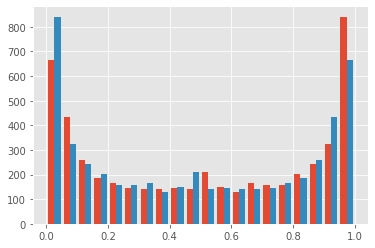

In [ ]:
plt.hist(pred_test, bins=20)

In [ ]:
result = []

for i in range(5000) :
  a = pred_test[i,0]
  b = pred_test[i,1]
  if a > b :
    result.append(0)
  else :
    result.append(1)

print(result)

[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 

In [ ]:
print(result[0:30])
print(result[30:60])
print(result[60:90])
print(result[90:120])

[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
count = 0
for i in range(5000) :
  if result[i] == 1 :
    count = count+1

print(count)
print(5000-count)

2424
2576


## 깃허브 데이터

In [ ]:
test = pd.read_csv('ratings_test.txt', sep='\t', quoting=3)

In [ ]:
samplenum = 5000

In [ ]:
test = test.sample(samplenum, replace = False)
test

,id,document,label
29431,6157826,아네트베닝은 완죤 할머니네 러브어패어에선 완죤이쁘더만...,0
47239,7476200,"여러가지를 시도해보긴,하는데,항상 다람쥐쳇바퀴 도는듯한 느낌?결국 액션스타로,크게 ...",0
16508,952020,장난하는 듯,0
49221,752672,별루다 정말 시간아까줘,0
15078,7524393,흑백 영화로 나온 지구 최후의 날이란 원작이 있고 2008년도 개봉한 키아누 리브스...,0
...,...,...,...
36962,10136004,그래도 속편이 나왔으면 좋겠다...,0
40928,9476328,밀라의 극에 달한 연기력 덕분에 빠져든다 빠져들어...,1
19227,6186780,"20번을 봐도 질리지 않는 영화, 존말코비치의 러시아인 연기는 최고!",1
49894,9751887,최악의 영화10자채우기도 아깝고 내돈 1200원아깝다,0


In [ ]:
list = np.arange(samplenum)
test.index = list
test

,id,document,label
0,6157826,아네트베닝은 완죤 할머니네 러브어패어에선 완죤이쁘더만...,0
1,7476200,"여러가지를 시도해보긴,하는데,항상 다람쥐쳇바퀴 도는듯한 느낌?결국 액션스타로,크게 ...",0
2,952020,장난하는 듯,0
3,752672,별루다 정말 시간아까줘,0
4,7524393,흑백 영화로 나온 지구 최후의 날이란 원작이 있고 2008년도 개봉한 키아누 리브스...,0
...,...,...,...
4995,10136004,그래도 속편이 나왔으면 좋겠다...,0
4996,9476328,밀라의 극에 달한 연기력 덕분에 빠져든다 빠져들어...,1
4997,6186780,"20번을 봐도 질리지 않는 영화, 존말코비치의 러시아인 연기는 최고!",1
4998,9751887,최악의 영화10자채우기도 아깝고 내돈 1200원아깝다,0


In [ ]:
test.isna().sum()

id          0
document    0
label       0
dtype: int64

In [ ]:
test = test.dropna(how = 'any')

In [ ]:
# preprocessed
test['preprocessed'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
test['preprocessed'] = test['preprocessed'].str.replace(" +", " ") # 다중 공백 제거

# tokenized_stem
tokenized = []
for sentence in test['preprocessed']:
    tokens = okt.morphs(sentence, stem = True) # stem = True로 설정해 어간 추출
    tokenize = " ".join(tokens)
    tokenized.append(tokenize)
test["tokenized_stem"] = pd.DataFrame(tokenized)

# main_pos
main_pos = []
for sentence in test['document']:
    pos = okt.pos(sentence)
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")]
    main_words_str = " ".join(main_words)
    main_pos.append(main_words_str)
test["main_pos"] = pd.DataFrame(main_pos)

test.head()

,id,document,label,preprocessed,tokenized_stem,main_pos
0,6157826,아네트베닝은 완죤 할머니네 러브어패어에선 완죤이쁘더만...,0,아네트베닝은 완죤 할머니네 러브어패어에선 완죤이쁘더만,아네트베닝 은 완죤 할머니 네 러브 어 패 어 에선 완죤이쁘더 만,아네트베닝 완죤 할머니 러브 패 완죤이쁘더
1,7476200,"여러가지를 시도해보긴,하는데,항상 다람쥐쳇바퀴 도는듯한 느낌?결국 액션스타로,크게 ...",0,여러가지를 시도해보긴하는데항상 다람쥐쳇바퀴 도는듯한 느낌결국 액션스타로크게 성공해보...,여러가지 를 시도 해보다 항상 다람쥐 쳇바퀴 도 는 듯 한 느낌 결국 액션 스타 로...,여러가지 시도 해보긴 하는데 항상 다람쥐 쳇바퀴 도 듯 느낌 결국 액션 스타 크게 ...
2,952020,장난하는 듯,0,장난하는 듯,장난 하다 듯,장난 하는 듯
3,752672,별루다 정말 시간아까줘,0,별루다 정말 시간아까줘,별루 다 정말 시간 아깝다,별루 정말 시간 아까줘
4,7524393,흑백 영화로 나온 지구 최후의 날이란 원작이 있고 2008년도 개봉한 키아누 리브스...,0,흑백 영화로 나온 지구 최후의 날이란 원작이 있고 년도 개봉한 키아누 리브스 주연의...,흑백 영화로 나오다 지구 최후 의 날 이란 원작 이 있다 년도 개봉 한 키 아누 리...,흑백 영화로 나온 지구 최후 날 원작 있고 개봉 키 아누 리브 스 주연 지구 멈추는...


In [ ]:
test.isna().sum()

id                0
document          0
label             0
preprocessed      0
tokenized_stem    0
main_pos          0
dtype: int64

In [ ]:
test = test.dropna(how = 'any')

# 제출 파일 생성

In [ ]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('dataset/sample_submission.csv')
submission.head()

In [ ]:
# 위에서 구한 예측값을 그대로 넣어줍니다.
submission['label'] = result

# 데이터가 잘 들어갔는지 확인합니다.
submission

In [ ]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("submission.csv", index=False)